<a href="https://colab.research.google.com/github/sarasafaee/nlp_basics/blob/main/spam_classification_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("SPAM text message 20170820 - Data.csv")
print(df.head())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


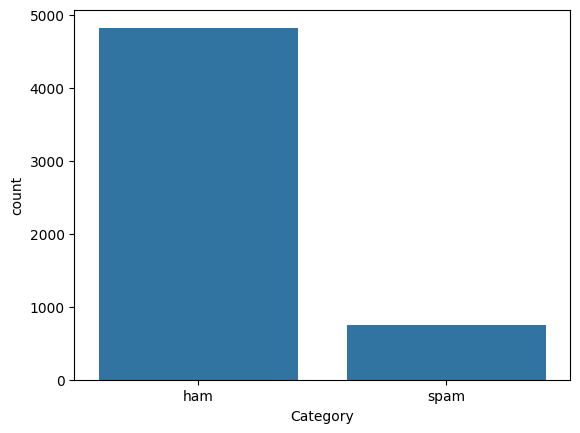

In [5]:
sns.countplot(x=df["Category"])
plt.show()

In [6]:
X = df["Message"]
Y = df["Category"]

print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
print(Y.shape)


0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object
[0 0 1 ... 0 0 0]
(5572,)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)
print(seq)

[[24, 2, 195, 23, 2, 143, 35, 74, 122], [125, 70, 167, 46, 6, 412, 6, 43, 20, 64, 204], [40, 427, 9, 42, 41], [54, 47, 267, 116], [57, 18, 5, 57, 1, 5, 65, 26, 57, 1, 14, 34, 5, 171], [171, 339, 5, 98, 62, 205, 378], [125, 49, 6, 205, 32, 134, 66, 40, 56, 22, 28, 6, 27, 186, 135, 10, 4, 16, 148], [26, 68], [10, 123, 360, 491, 65, 150, 298, 491], [100, 8, 191, 1, 428, 34, 191, 340, 28, 6, 55, 341, 34, 10, 73, 3, 315, 75, 329, 322, 240], [305, 61, 2, 339, 10, 84], [12, 32, 342, 3, 200, 4, 177, 201, 316, 75, 3, 157, 379, 316], [187, 13, 101, 38, 60, 330, 4, 479, 168, 18, 40, 9, 102, 396, 3, 206, 2, 16], [110, 48, 70, 84, 42, 41, 1, 91, 67, 106], [77, 38, 90, 140, 3, 27], [120, 46, 2, 21, 2, 45], [175, 24, 136, 175, 68, 39, 281], [109, 43, 3, 220, 111, 2, 17, 4, 56, 331, 47, 21, 6, 1, 84], [271, 107, 14, 60, 19, 1, 95, 14, 50, 99, 32, 25, 4, 6, 14, 205], [36, 134, 282, 84, 7, 460, 3, 2, 27, 2, 17, 4, 361, 332, 151], [58, 161, 2, 413, 3], [63, 123, 234, 24, 63, 93, 251, 2, 5, 252], [1, 36, 

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
print(padded_docs)

[[  0   0   0 ...  35  74 122]
 [  0   0   0 ...  20  64 204]
 [  0   0   0 ...   9  42  41]
 ...
 [  0   0   0 ...   6  44 387]
 [  0   0   0 ...  44 303 204]
 [  0   0   0 ...   2  33 116]]


In [9]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [10]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

accr = model.evaluate(test_padded, Y_test)
print(accr)

Epoch 1/10
28/28 [==============================] - 26s 820ms/step - loss: 0.4226 - accuracy: 0.8693 - val_loss: 0.3418 - val_accuracy: 0.8688
Epoch 2/10
28/28 [==============================] - 26s 941ms/step - loss: 0.2263 - accuracy: 0.9156 - val_loss: 0.1251 - val_accuracy: 0.9529
Epoch 3/10
28/28 [==============================] - 24s 877ms/step - loss: 0.0833 - accuracy: 0.9734 - val_loss: 0.0740 - val_accuracy: 0.9787
Epoch 4/10
28/28 [==============================] - 24s 856ms/step - loss: 0.0587 - accuracy: 0.9812 - val_loss: 0.0632 - val_accuracy: 0.9787
Epoch 5/10
28/28 [==============================] - 25s 909ms/step - loss: 0.0472 - accuracy: 0.9865 - val_loss: 0.0735 - val_accuracy: 0.9776
Epoch 6/10
28/28 [==============================] - 24s 851ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0569 - val_accuracy: 0.9843
Epoch 7/10
28/28 [==============================] - 23s 796ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0572 - val_accuracy: 0.9865

In [11]:
model.save('mymodel')

In [12]:
from tensorflow.keras.models import load_model
new_model = load_model('mymodel')

In [13]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
new_model.get_weights()

[array([[ 0.04374796,  0.00989876, -0.02524743, ...,  0.01096944,
          0.0030733 , -0.01260267],
        [ 0.08603989, -0.07759924, -0.0948249 , ...,  0.06253012,
          0.05159489, -0.10695424],
        [ 0.0415695 , -0.00714188, -0.03585807, ...,  0.00516433,
         -0.03582922, -0.02821465],
        ...,
        [ 0.07878067, -0.11180966, -0.04936322, ...,  0.13342686,
          0.14132458, -0.11842423],
        [-0.06892619,  0.05536568,  0.10665202, ..., -0.03702395,
         -0.09910934,  0.08376381],
        [ 0.06704457, -0.10168754, -0.09419768, ...,  0.03805405,
          0.0309835 , -0.04202866]], dtype=float32),
 array([[-0.03265664,  0.07479735,  0.07849311, ..., -0.06120074,
         -0.02452731,  0.03473219],
        [ 0.01916302,  0.03627942, -0.10186153, ..., -0.04141183,
         -0.1065069 , -0.10438541],
        [-0.04675681,  0.01166956, -0.07487344, ..., -0.06069652,
          0.01231829, -0.01679115],
        ...,
        [-0.00033666, -0.02840689, -0.0

In [15]:
new_model.optimizer

In [16]:
# other way of saving models
model_json_string = model.to_json()

In [20]:
from tensorflow.keras.models import model_from_json
model_json = model_from_json(model_json_string)

In [21]:
model_json.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
#another way that mostly gets used is for using these weights for another model
#model.save_weights('my_weights')